Solution took 0.001 sec
[1.33928571e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[-3.  -7.5  4.5 -3.  -4.5  0. ]


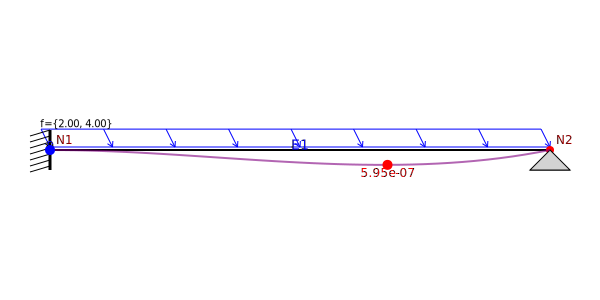

In [7]:
import sys
sys.path.append("..")
from flip import Solver, Domain, Beam2D, Node, Material, CrossSection, UniformDistributedLoad, DofID, plot_internal_forces_on_structure, plot_model_drawsvg

# Domain
solver = Solver()
domain = solver.domain
    
# Nodes
domain.add_node(Node(1, domain, coords=[0.0, 0.0, 0.0], bcs=[DofID.Dx, DofID.Dz, DofID.Ry]))
domain.add_node(Node(2, domain, coords=[3.0, 0.0, 0.0], bcs=[DofID.Dx, DofID.Dz]))
# Material & section
domain.add_material(Material("mat01", e=210e9))
domain.add_cs(CrossSection("cs01", a=0.02, iy=8e-6, k=1.0e32))

# Element
domain.add_element(Beam2D(1, domain, nodes=(1, 2), mat="mat01", cs="cs01"))

# Load
domain.apply_element_load(1, UniformDistributedLoad(fx=2.0, fz=4.0) )

# Solve
solver.solve()
print(solver.r)
print (domain.elements[1]._end_forces_local())

## Plot results
plot_model_drawsvg(domain, width_px=600, height_px=300, show_deformed=True, deform_scale=1.e6, margin=50)

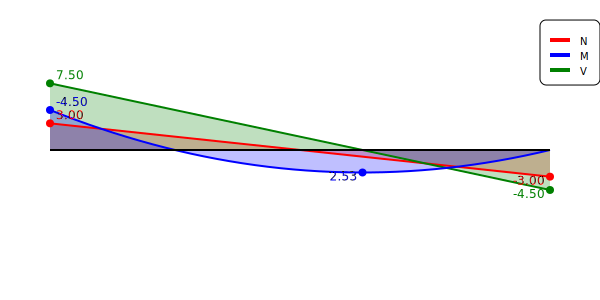

In [8]:
plot_internal_forces_on_structure (domain, diagrams=["N", "V", "M"], scale=0.4, width_px=600, height_px=300, margin=50)